# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_df = requests.get(btc_url)
btc_df.json()

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18703131,
   'total_supply': 18703131,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 58181.0,
     'volume_24h': 66288952288,
     'market_cap': 1086443098615,
     'percentage_change_1h': 0.145318801314855,
     'percentage_change_24h': 4.17933494245446,
     'percentage_change_7d': 0.609791777161587,
     'percent_change_1h': 0.145318801314855,
     'percent_change_24h': 4.17933494245446,
     'percent_change_7d': 0.609791777161587},
    'CAD': {'price': 70602.6435,
     'volume_24h': 80441643601.488,
     'market_cap': 1318398700169.3,
     'percent_change_1h': 0.145318801314855,
     'percent_change_24h': 4.17933494245446,
     'percent_change_7d': 0.609791777161587}},
   'last_updated': 1620445744}},
 'metadata': {'timestamp': 1620445744,
  'num_cryptocurrencies': 1303,
  'error': None}}

In [6]:
btc_price = btc_df.json()['data']['1']['quotes']['USD']['price']
btc_price

58181.0

In [7]:
# Fetch current ETH price
eth_df = requests.get(eth_url)
eth_df.json()

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 115784104,
   'total_supply': 115784104,
   'max_supply': 0,
   'quotes': {'USD': {'price': 3532.86,
     'volume_24h': 43270452110,
     'market_cap': 409055286124,
     'percentage_change_1h': -0.0043078142037125,
     'percentage_change_24h': 2.70126755666744,
     'percentage_change_7d': 27.2320763961909,
     'percent_change_1h': -0.0043078142037125,
     'percent_change_24h': 2.70126755666744,
     'percent_change_7d': 27.2320763961909},
    'CAD': {'price': 4287.12561,
     'volume_24h': 52508693635.485,
     'market_cap': 496388589711.474,
     'percent_change_1h': -0.0043078142037125,
     'percent_change_24h': 2.70126755666744,
     'percent_change_7d': 27.2320763961909}},
   'last_updated': 1620445746}},
 'metadata': {'timestamp': 1620445746,
  'num_cryptocurrencies': 1303,
  'error': None}}

In [8]:
eth_price = eth_df.json()['data']['1027']['quotes']['USD']['price']
eth_price

3532.86

In [9]:
# Compute current value of my crpto
my_btc_value = round((btc_price * my_btc),2)
my_eth_value = round((eth_price * my_eth),2)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69817.20
The current value of your 5.3 ETH is $18724.16


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
        
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


In [12]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-01-01",tz="Australia/Sydney").isoformat()
end_date = pd.Timestamp("2021-05-07", tz="Australia/Sydney").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_spy_agg = alpaca.get_barset(tickers, timeframe, start = start_date, end = end_date,limit=1000).df

# drop time from index
df_spy_agg.index = df_spy_agg.index.date

# Preview DataFrame
df_spy_agg.head()


AGG                                         SPY          \
              open    high       low    close   volume    open    high   
2020-12-31  118.18  118.24  118.1200  118.200  4325026  371.78  374.66   
2021-01-04  118.08  118.14  117.9850  118.040  6211938  375.31  375.45   
2021-01-05  118.06  118.06  117.7500  117.915  5915389  368.10  372.50   
2021-01-06  117.90  117.90  117.1500  117.360  8587136  369.71  376.98   
2021-01-07  117.13  117.26  117.0667  117.210  4949593  376.10  379.90   

                                       
                low   close    volume  
2020-12-31  371.232  373.85  52720911  
2021-01-04  364.820  368.85  92938087  
2021-01-05  368.050  371.32  53668865  
2021-01-06  369.120  373.53  91989131  
2021-01-07  375.910  379.06  58862006

In [13]:
# Pick AGG and SPY close prices
agg_close_price = df_spy_agg['AGG']['close'][-1]
spy_close_price = df_spy_agg['SPY']['close'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.65
Current SPY closing price: $419.08


In [14]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20954.00
The current value of your 200 AGG shares is $22930.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(index = ('crypto','shares'),columns=['amount'])
df_savings['amount'] = [(my_btc_value + my_eth_value), (my_spy_value+my_agg_value)]

# Display savings DataFrame
display(df_savings)

,amount
crypto,88541.36
shares,43884.00


<AxesSubplot:ylabel='amount'>

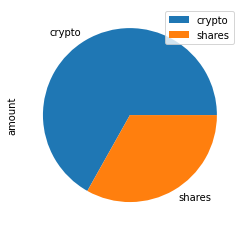

In [16]:
# Plot savings pie chart
df_savings['amount'].plot.pie(legend=True)

In [17]:
value = df_savings.sum()
value.item()

132425.36

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.loc['crypto'].item() + df_savings.loc['shares'].item()
round_total_savings = round(total_savings)
print(f"Your total savings are ${round_total_savings}.")

# Validate saving health
print(f"The recommended amount needed in your emergency fund is ${emergency_fund}.")
if total_savings >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("Continue saving, you need more in your emergency fund.")


Your total savings are $132425.
The recommended amount needed in your emergency fund is $36000.
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date_a = pd.Timestamp('2016-05-06', tz='America/New_York').isoformat()
end_date_a = pd.Timestamp('2021-05-06', tz='America/New_York').isoformat()

start_date_b = pd.Timestamp('2019-05-07', tz='America/New_York').isoformat()
end_date_b = pd.Timestamp('2021-05-06', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ['SPY','AGG']
timeframe = '1D'

# Pulling two dataframes as data is greater than 1000 rows
df_stock_data_a = alpaca.get_barset(tickers, timeframe, start = start_date_a, end = end_date_a,limit=1000).df
df_stock_data_b = alpaca.get_barset(tickers, timeframe, start = start_date_b, end = end_date_b,limit=1000).df

# Concatenate two datasets to combine data
df_stock_data = pd.concat([df_stock_data_a,df_stock_data_b],axis='rows')

# drop time from index to neaten index
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                             SPY          \
              open      high       low    close     volume    open    high   
2017-05-16  108.88  109.1010  108.8800  109.000  1394153.0     NaN     NaN   
2017-05-17  109.35  109.6000  109.2800  109.560  2263851.0  238.10  238.64   
2017-05-18  109.54  109.6299  109.4433  109.550  1873534.0  235.70  237.75   
2017-05-19  109.51  109.5350  109.3520  109.525  1345002.0  237.33  239.08   
2017-05-22  109.43  109.4800  109.4000  109.440  1199164.0  238.90  239.71   

                                         
               low   close       volume  
2017-05-16     NaN     NaN          NaN  
2017-05-17  235.75  235.85  118613594.0  
2017-05-18  235.43  236.67   82965499.0  
2017-05-19  237.27  238.30   69366163.0  
2017-05-22  238.82  239.53   37630972.0

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(portfolio_data = df_stock_data,weights = [.40,.60],num_simulation = 500,num_trading_days = 252*30)


In [22]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2017-05-16  108.88  109.1010  108.8800  109.000  1394153.0          NaN   
2017-05-17  109.35  109.6000  109.2800  109.560  2263851.0     0.005138   
2017-05-18  109.54  109.6299  109.4433  109.550  1873534.0    -0.000091   
2017-05-19  109.51  109.5350  109.3520  109.525  1345002.0    -0.000228   
2017-05-22  109.43  109.4800  109.4000  109.440  1199164.0    -0.000776   

               SPY                                                    
              open    high     low   close       volume daily_return  
2017-05-16     NaN     NaN     NaN     NaN          NaN          NaN  
2017-05-17  238.10  238.64  235.75  235.85  118613594.0          NaN  
2017-05-18  235.70  237.75  235.43  236.67   82965499.0     0.003477  
2017-05-19  237.33  239.08  237.27  238.30   69366163.0     0.006887  
2017-05-22  238.90  239.71  238.82  239.53   37630972.0     0.005162

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989704,1.016406,1.012581,0.987375,1.010670,1.016704,1.008203,1.022456,1.000003,1.006141,...,1.002432,1.018073,1.017428,1.002013,1.006640,1.011858,0.986959,1.009536,0.984121,1.013403
2,0.993680,1.008099,1.012505,0.982258,1.001264,1.026374,1.014042,1.037846,0.998910,1.007538,...,1.017392,1.017354,1.008026,0.990001,0.995311,1.014016,0.969458,1.004749,0.984262,1.012094
3,0.989824,1.013438,1.005189,0.987252,1.000723,1.032613,1.010729,1.039915,0.985987,1.005415,...,1.028864,1.026516,1.015969,0.961776,1.013620,1.018738,0.982862,0.981927,0.977742,1.013379
4,0.994041,1.017769,1.004880,0.992680,1.023356,1.035689,0.994533,1.031096,1.003791,0.991752,...,1.012500,1.036437,1.008138,0.942499,1.012151,1.015807,0.989943,0.986303,0.989099,1.021889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.182129,4.786856,8.244538,2.886321,2.708997,41.175381,6.001440,2.649464,15.210316,3.972671,...,34.047639,15.945472,5.893033,3.754233,5.609299,14.521688,38.371916,2.131583,8.767955,11.953088
7557,5.177037,4.819269,8.214096,2.924185,2.719159,40.925712,5.955730,2.650542,15.383704,4.028616,...,34.544338,15.922586,5.851131,3.802471,5.586046,14.484447,38.600968,2.148517,8.797954,11.968849
7558,5.147779,4.836862,8.110630,2.958116,2.774635,40.518604,5.865744,2.663206,15.281160,3.999389,...,34.107266,15.583946,5.797128,3.866257,5.587522,14.235422,38.945838,2.184641,8.670572,11.887325
7559,5.074747,4.803765,8.123174,2.914757,2.747360,41.330868,5.874670,2.686308,15.477335,4.003528,...,33.892945,15.693548,5.676772,3.834574,5.729861,14.304860,38.918439,2.186512,8.757228,11.891459


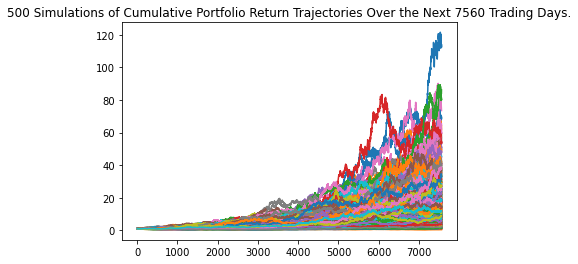

In [24]:
# Plot simulation outcomes
thirtyyr_line_plot = MC_thirtyyear.plot_simulation()

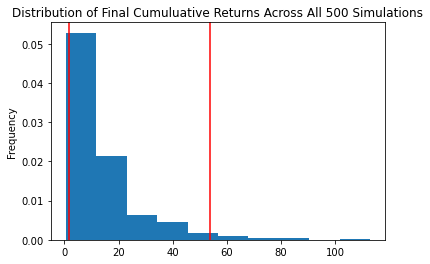

In [25]:
# Plot probability distribution and confidence intervals
thirtyyr_dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
thirtyyr_tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(thirtyyr_tbl)

count           500.000000
mean             14.047454
std              14.309494
min               0.478362
25%               4.676201
50%               9.390014
75%              18.089635
max             112.929357
95% CI Lower      1.524394
95% CI Upper     53.802575
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
thirtyyr_ci_lower = round(thirtyyr_tbl[8]*initial_investment,2)
thirtyyr_ci_upper = round(thirtyyr_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${thirtyyr_ci_lower:,} and ${thirtyyr_ci_upper:,}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $30,487.89 and $1,076,051.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
incr_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
incr_ci_lower = round(thirtyyr_tbl[8]*initial_investment,2)
incr_ci_upper = round(thirtyyr_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${incr_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${incr_ci_lower:,} and ${incr_ci_upper:,}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $30,487.89 and $1,076,051.49


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(portfolio_data = df_stock_data,weights = [.40,.60],num_simulation = 500,num_trading_days = 252*5)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001804,1.000610,1.007181,1.004743,0.993375,0.994995,1.008686,0.987214,1.001094,1.009782,...,1.003895,0.993224,0.994096,0.997919,0.998042,0.987741,0.992854,0.997214,1.004574,1.005585
2,0.999207,0.983016,0.996624,1.000972,1.002980,0.975918,0.996967,0.981161,1.002670,1.037753,...,1.007515,1.011223,0.991184,0.996900,1.007857,0.970102,0.988428,0.996443,1.000814,0.987742
3,0.995946,0.989827,0.985605,1.000404,0.989058,0.980775,1.019264,0.963384,1.004352,1.018269,...,1.000538,1.015292,0.983538,1.000707,1.016553,0.973526,1.001060,0.999619,0.988832,0.989870
4,1.012853,0.990668,0.998712,1.015282,1.013956,0.954674,1.000982,0.955705,1.013737,1.005824,...,1.009233,1.014394,0.972020,1.016944,1.010056,0.979973,0.988196,0.994799,0.989325,0.975894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.100154,1.403009,1.126271,1.386555,1.722572,0.889949,1.705286,2.476903,2.124291,1.327343,...,1.602723,1.970352,1.270178,1.090405,1.567575,1.192751,2.346686,0.784670,1.677086,1.659945
1257,1.102905,1.410663,1.119760,1.371346,1.728308,0.896151,1.695419,2.437805,2.161759,1.352181,...,1.616671,1.949904,1.280123,1.094324,1.555002,1.194513,2.304429,0.786759,1.666389,1.684863
1258,1.090610,1.395776,1.143136,1.351059,1.736386,0.895154,1.689740,2.425936,2.148414,1.341600,...,1.624511,1.973127,1.272427,1.086101,1.541394,1.198054,2.291463,0.790095,1.665228,1.667544
1259,1.096340,1.409469,1.141839,1.355947,1.725258,0.900694,1.707743,2.419171,2.164999,1.323539,...,1.638976,1.966010,1.289391,1.071334,1.544097,1.160163,2.268111,0.786028,1.621926,1.675057


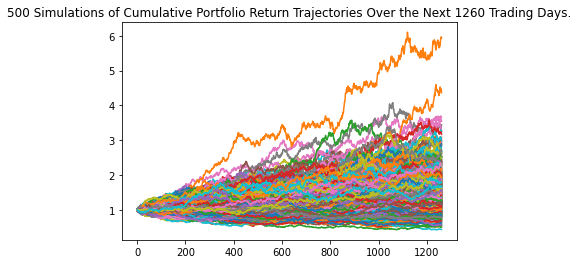

In [33]:
# Plot simulation outcomes
fiveyr_line_plot = MC_fiveyear.plot_simulation()

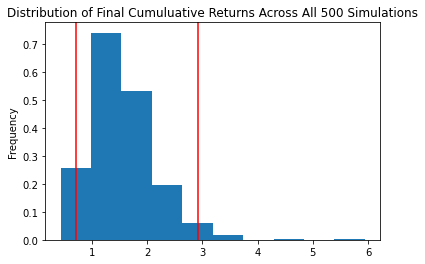

In [34]:
# Plot probability distribution and confidence intervals
fiveyr_dist_plot = MC_fiveyear.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyr_tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(fiveyr_tbl)

count           500.000000
mean              1.568178
std               0.601596
min               0.433159
25%               1.155319
50%               1.469962
75%               1.894364
max               5.944042
95% CI Lower      0.707908
95% CI Upper      2.929845
Name: 1260, dtype: float64


In [36]:
# Set initial investment
fiveyr_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(fiveyr_tbl[8]*60000,2)
ci_upper_five = round(fiveyr_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${fiveyr_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,} and ${ci_upper_five:,}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $42,474.49 and $175,790.73


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(portfolio_data = df_stock_data,weights = [.40,.60],num_simulation = 500,num_trading_days = 252*10)

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983931,0.975923,0.987400,1.014516,0.990792,1.004921,0.999888,0.990744,0.974658,0.981329,...,0.976581,0.997223,0.983768,0.983982,1.000259,1.020540,1.005039,1.006261,0.992364,0.992254
2,0.980217,0.961650,0.988213,1.000381,0.986475,0.989175,0.993434,0.995082,0.992264,0.986999,...,0.985471,0.991444,0.971891,0.994939,1.008566,1.030445,1.006433,1.024150,1.001108,0.977396
3,0.979518,0.975963,0.980774,1.005459,1.008401,1.007513,0.982911,1.006468,1.008385,0.979112,...,0.996849,0.978328,0.971835,0.999884,0.998970,1.034222,0.998535,1.026633,1.008082,0.955651
4,0.995363,0.950876,0.984859,1.014291,1.009611,1.013377,0.994307,1.008809,0.989161,0.975319,...,0.984575,0.975790,0.967550,1.007020,1.001211,1.039717,1.000912,1.033762,0.995058,0.953517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.574509,3.650823,0.928187,0.862805,1.415354,3.095551,4.968558,2.749965,1.039524,2.360896,...,3.234041,1.430743,0.918047,3.403696,0.981122,5.482408,1.599188,1.948910,2.350213,3.253853
2517,1.557816,3.700095,0.929841,0.850506,1.440967,3.068083,4.964550,2.750053,1.028857,2.362242,...,3.225944,1.412344,0.922711,3.444142,0.973270,5.564797,1.566380,1.952701,2.366691,3.249522
2518,1.578112,3.678359,0.923783,0.860844,1.429436,3.123058,5.024619,2.743732,1.051096,2.389085,...,3.274789,1.410901,0.904417,3.559507,0.981277,5.626461,1.567550,1.957255,2.381075,3.269680
2519,1.580782,3.714200,0.918083,0.866392,1.437575,3.141096,5.009909,2.785450,1.055053,2.406293,...,3.318739,1.403130,0.902154,3.515472,0.969546,5.692595,1.572777,1.958271,2.380983,3.218687


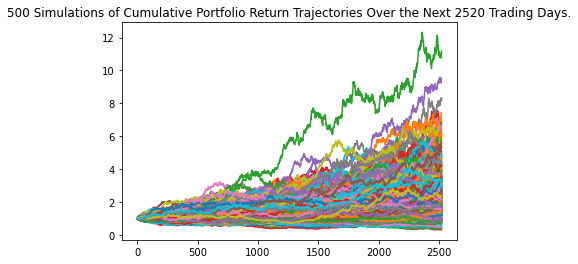

In [39]:
# Plot simulation outcomes
tenyr_line_plot = MC_tenyear.plot_simulation()

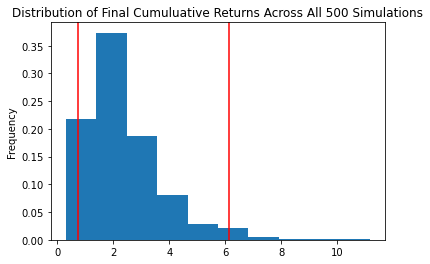

In [40]:
# Plot probability distribution and confidence intervals
tenyr_dist_plot = MC_tenyear.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyr_tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tenyr_tbl)

count           500.000000
mean              2.384343
std               1.397357
min               0.301969
25%               1.434645
50%               2.044601
75%               2.941555
max              11.176396
95% CI Lower      0.739895
95% CI Upper      6.148317
Name: 2520, dtype: float64


In [42]:
# Set initial investment
tenyr_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tenyr_tbl[8]*60000,2)
ci_upper_ten = round(tenyr_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${tenyr_initial_investment:,} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,} and ${ci_upper_ten:,}")

There is a 95% chance that an initial investment of $60,000 in the portfolio over the next 10 years will end within in the range of $44,393.72 and $368,899.02
